In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set visual style
sns.set_style("whitegrid")

#import my functions
from data_cleaning import get_clean_data

# Getting my clean and merged data
print("Loading data...")
df = get_clean_data()
print(f"Data loaded successfully. Shape: {df.shape}")
df.head()

Loading data...
Acquiring data...
Successfully fetched 100 days of data for IBM
Successfully fetched marketing data.
Cleaning and transforming data...
Stock data cleaned and transformed
Marketing data cleaned and transformed.
Merging datasets...
Datasets merged successfully. Final shape: (63, 16)
Data loaded successfully. Shape: (63, 16)


,daily_visitors,click_through_rate,conversion_rate,avg_order_value,campaign_id,sales,cost_factor,cost,roas,open,high,low,close,volume,daily_return,moving_avg_7d
2025-04-30,4.4,2.9,1.4,0.2,setosa,1.23,0.5,0.62,1.98,236.730,242.47,234.3401,241.82,5142993.0,1.015080,237.927143
2025-05-01,4.9,3.1,1.5,0.1,setosa,0.74,0.5,0.37,2.00,241.440,242.37,237.9450,239.66,4243294.0,-0.893226,237.750000
2025-05-02,5.4,3.7,1.5,0.2,setosa,1.62,0.5,0.81,2.00,243.125,245.69,241.3300,245.55,3731946.0,2.457648,237.760000
2025-05-05,4.3,3.0,1.1,0.1,setosa,0.47,0.5,0.24,1.96,243.740,249.80,243.6400,249.18,4138168.0,1.478314,240.595714
2025-05-06,5.8,4.0,1.2,0.2,setosa,1.39,0.5,0.70,1.99,247.760,250.19,246.1100,249.12,2900556.0,-0.024079,242.982857


In [4]:
# 1. Basic Info
print("DATASET INFO:")
print(df.info())
print("\n" + "="*50 + "\n")

#2. Summary Statistics for key numerical columns
key_metrics = ['sales', 'cost', 'roas', 'daily_visitors', 'close', 'daily_return']
print("SUMMARY STATISTICS FOR KEY METRICS: ")
print(df[key_metrics].describe())
print("\n" + "="*50 + "\n")

# 3. Checking for missing values
print("MISSING VALUES: ")
print(df.isnull().sum())

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2025-04-30 to 2025-07-30
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   daily_visitors      63 non-null     float64
 1   click_through_rate  63 non-null     float64
 2   conversion_rate     63 non-null     float64
 3   avg_order_value     63 non-null     float64
 4   campaign_id         63 non-null     object 
 5   sales               63 non-null     float64
 6   cost_factor         63 non-null     float64
 7   cost                63 non-null     float64
 8   roas                63 non-null     float64
 9   open                63 non-null     float64
 10  high                63 non-null     float64
 11  low                 63 non-null     float64
 12  close               63 non-null     float64
 13  volume              63 non-null     float64
 14  daily_return        63 non-null     float64
 15  moving_avg_7d       63 no

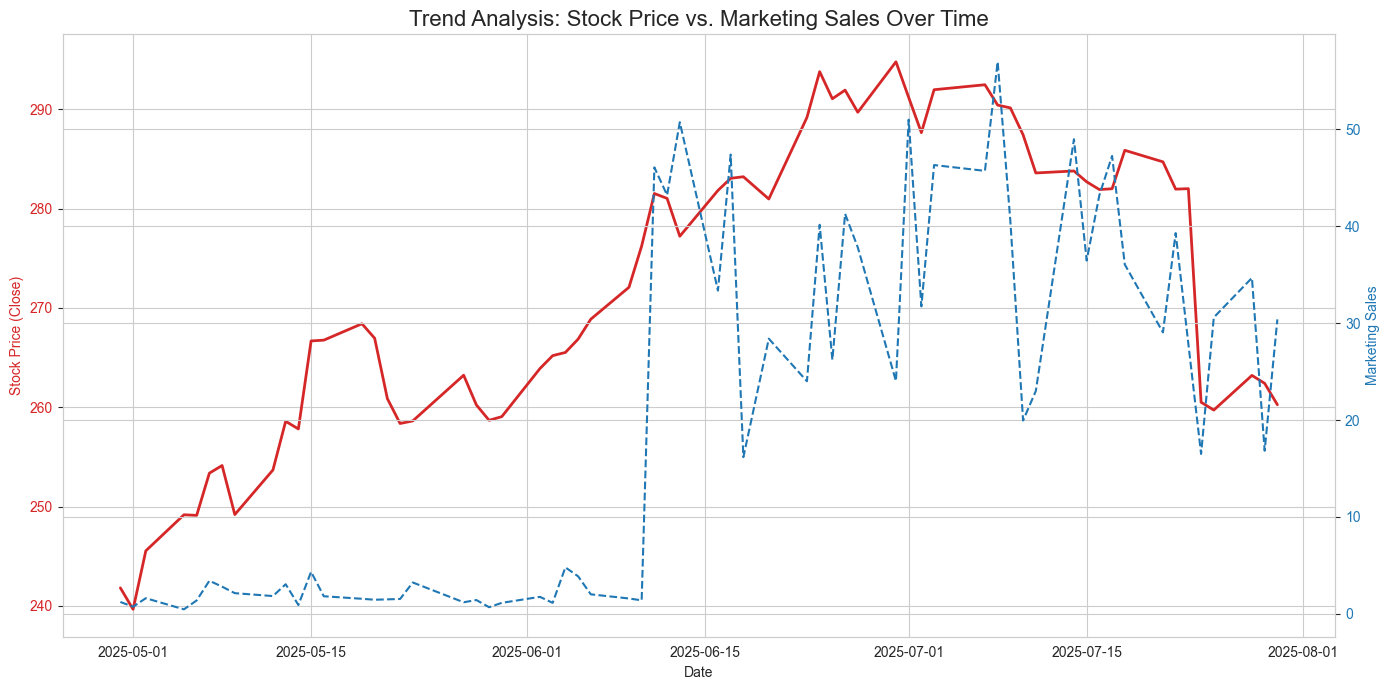

In [5]:
#Create a plot withj two y-axis to compare trends
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (Close)', color=color)
ax1.plot(df.index, df['close'], color=color, label='Stock Price', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Marketing Sales', color=color)
ax2.plot(df.index, df['sales'], color=color, label='Marketing Sales', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and grid
plt.title('Trend Analysis: Stock Price vs. Marketing Sales Over Time', fontsize=16)
fig.tight_layout()
plt.show()

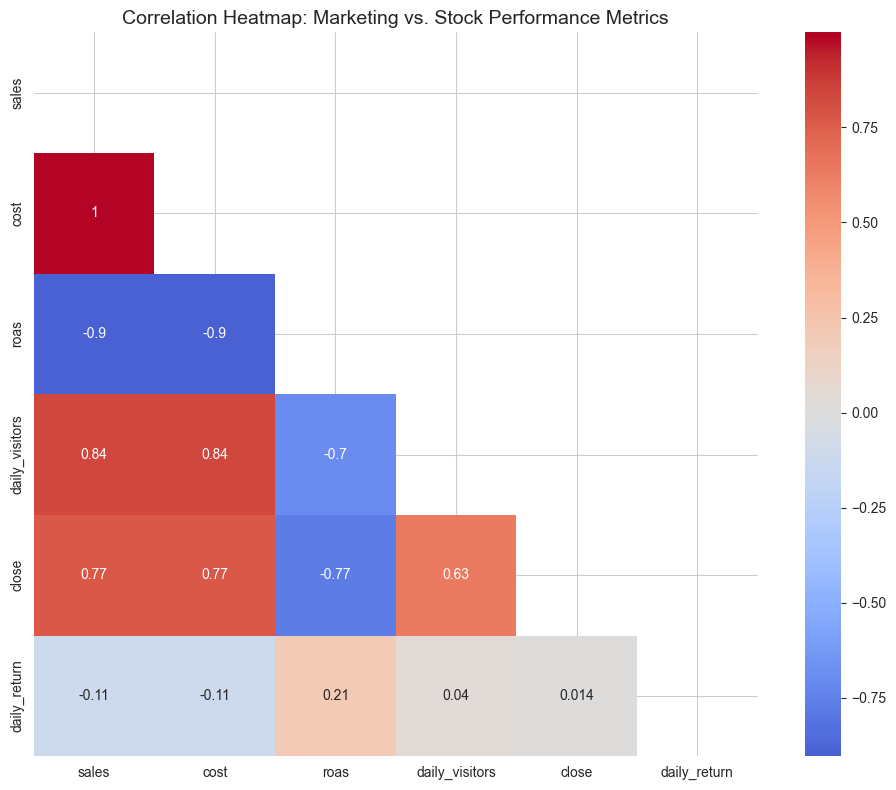

In [7]:
# Calculate correlations between key numerical metrics
correlation_matrix = df[key_metrics].corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Mask the upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap: Marketing vs. Stock Performance Metrics', fontsize=14)
plt.tight_layout()
plt.show()

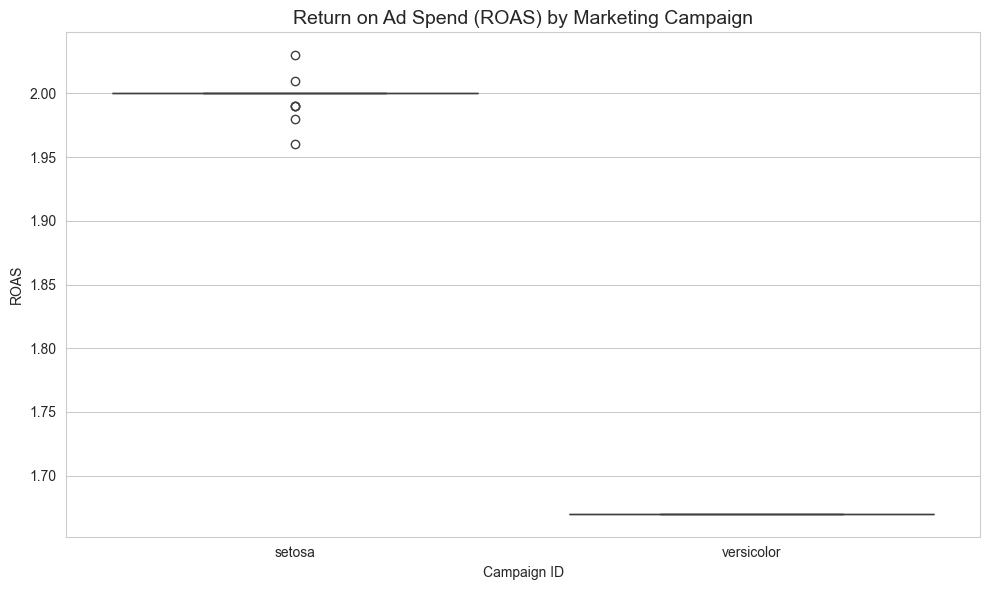

In [8]:
# Compare performance of different marketing campaigns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='campaign_id', y='roas')
plt.title('Return on Ad Spend (ROAS) by Marketing Campaign', fontsize=14)
plt.xlabel('Campaign ID')
plt.ylabel('ROAS')
plt.tight_layout()
plt.show()